<a href="https://colab.research.google.com/github/colaresm/Speech-recognition/blob/main/Classifica%C3%A7%C3%A3o_de_locutores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import seaborn as sns
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
from google.colab import files
import librosa
import librosa.display
%matplotlib inline
from IPython.display import Audio, display, Image
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [3]:
from google.colab import drive, files
drive.mount('/content/drive/')
from os import listdir

Mounted at /content/drive/


In [5]:
speakers_dir = '/content/drive/MyDrive/wav48';
speakers = listdir(speakers_dir);
n_speakers =20 # quantidade de locutores
amostras =100 # quantidade de frases
speakers_list = []; # lista de locutores
i1 = 0;
for speaker in speakers[0:n_speakers]:
  for scenario in listdir(speakers_dir+'/'+speaker)[0:amostras]:
    record_path = speakers_dir+'/'+speaker+'/'+scenario
    speakers_list.append(record_path)

In [ ]:
len(speakers_list)

2000

In [6]:
def geraimagem(som,label,sr):
  melspectrogram=[]
  n_fft = 2048
  hop_length = 512
  mel_feat = librosa.feature.melspectrogram(som,44000)
  power = librosa.power_to_db(mel_feat)
  return power

In [10]:
imagem_db = [];
labels=[]
for i in range(0,len(speakers_list)):
  y, sr = librosa.load(speakers_list[i],duration=1.0) 
  whale_song, _ = librosa.effects.trim(y)
  loc = str(i)+'amostra'
  imagem_db.append(geraimagem(whale_song,loc,sr))
  labels.append( str(i))
  print('total amostras',len(imagem_db))


total amostras 1
total amostras 2
total amostras 3
total amostras 4
total amostras 5
total amostras 6
total amostras 7
total amostras 8
total amostras 9
total amostras 10
total amostras 11
total amostras 12
total amostras 13
total amostras 14
total amostras 15
total amostras 16
total amostras 17
total amostras 18
total amostras 19
total amostras 20
total amostras 21
total amostras 22
total amostras 23
total amostras 24
total amostras 25
total amostras 26
total amostras 27
total amostras 28
total amostras 29
total amostras 30
total amostras 31
total amostras 32
total amostras 33
total amostras 34
total amostras 35
total amostras 36
total amostras 37
total amostras 38
total amostras 39
total amostras 40
total amostras 41
total amostras 42
total amostras 43
total amostras 44
total amostras 45
total amostras 46
total amostras 47
total amostras 48
total amostras 49
total amostras 50
total amostras 51
total amostras 52
total amostras 53
total amostras 54
total amostras 55
total amostras 56
t

Para da cada frase calcula-se o espectrogramada de uma delas, o conteúdo de cada uma consiste em uma matriz a quel será utilizada para a classificação dos locutores.

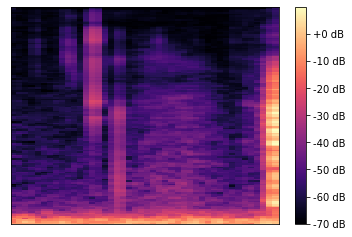

In [11]:
librosa.display.specshow(imagem_db[1])
plt.colorbar(format='%+2.0f dB')

In [12]:
#o locutor que queremos reconhecer será chamado de 1 e os demais são impostores e chamados de 0.
gabarito = np.zeros(len(speakers_list))
gabarito[0 : amostras ] = 1

In [50]:
 
image =imagem_db[0]
image1 = imagem_db[1]
X = []

X = np.concatenate((image,image1), axis=0) 
for i in range(2,len(imagem_db)):
  image =imagem_db[i]
  X = np.concatenate((X,image), axis=0) 
XB=X

In [51]:
y=gabarito
y = np.array(y)
Y = y.reshape(-1)
X = X.reshape(len(y), -1)

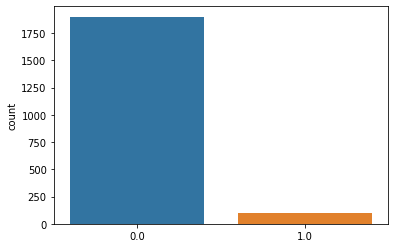

In [52]:
ax = sns.countplot(x=y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


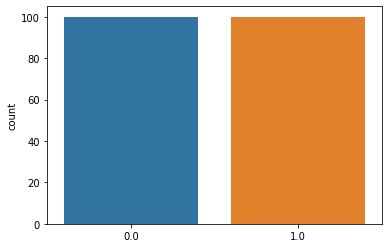

In [53]:
from imblearn.under_sampling import NearMiss 
# Rebalanceando as classes
nr = NearMiss()
X, y = nr.fit_sample(X, y)
ax = sns.countplot(x=y)

In [54]:
# Dividindo os dados para o teste e o treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Classificação utilizando KNN
Inicialmente busca-se o valor de vizinhos próximos que proporciona a melhor acurácia.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
kdoknn = []
desempenhodoknn = []
def scorek(N):
  knn = KNeighborsClassifier(n_neighbors=N)
  knn.fit(X_train, y_train)
  return 100*knn.score(X_test, y_test)
for i in range(1,20):
  desempenhodoknn.append(scorek(i))
  kdoknn.append(i)

In [20]:
desempenhodoknn.index(max(desempenhodoknn))
kdoknn[desempenhodoknn.index(max(desempenhodoknn))]

1

In [21]:
max(desempenhodoknn)

92.5

Text(0.5, 0, 'Valores de K')

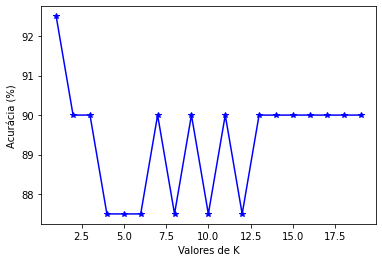

In [22]:
plt.plot(kdoknn,desempenhodoknn,color='b',linestyle='-',marker='*')
plt.ylabel('Acurácia (%)')
plt.xlabel('Valores de K')

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = kdoknn[desempenhodoknn.index(max(desempenhodoknn))]) 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
# Matriz de confusão
log_confusion_matrix = confusion_matrix(y_test, knn.predict(X_test))
log_confusion_matrix

array([[23,  0],
       [ 3, 14]])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Fronteiras de Complexidade - KNN')

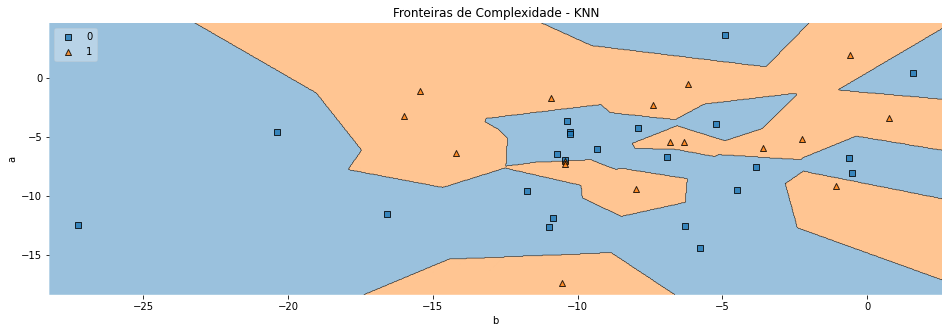

In [25]:
from mlxtend.plotting import plot_decision_regions
Xa = np.array(X_test)[:,[0,2]]
ya = y_test
ya= np.array(ya, dtype=int)
knn = KNeighborsClassifier(n_neighbors=kdoknn[desempenhodoknn.index(max(desempenhodoknn))])
knn.fit(Xa, ya)
plt.figure(figsize=(16,5))
plot_decision_regions(Xa,ya,clf=knn,legend=2)
plt.xlabel('b')
plt.ylabel('a')
plt.title('Fronteiras de Complexidade - KNN')

# PCA - Análise das componentes pricipais

Utiliza-se a PCA como forma uma de reduzir a dimensionalidade dos dads, ou seja, iremos gerar novos preditores que são combinações dos preditores originais, entretanto, o número de novos preditores será menor que a quantidade original. A técnica utilizada será a ***principal component analysis*** ou PCA (Análise das componentes pricipais).

PCA é uma técnica que possibilita a redução das dimensões de uma matriz de dados $\boldsymbol {X} $ de tamanho $ n\times p $. Entretanto, de certa forma, como características dos dados originais são preservadas. A primeira componente é combinação linear normalizada das variáveis ​​originais.

$$ Z_1 = \underbrace {\phi_ {11} X {_1} + \phi_ {2_1} X {_2} + \phi_ {p_1} X_ {p}} _ {\text {PC1}} \ $$
As componentes geradas apresentam uma maior variância. Os coeficientes possuem a seguinte limitação $\sum_ {j} ^ {p} \phi ^ {2} _ {ij} = 1 $.  

  

Text(0, 0.5, 'Explained variance')

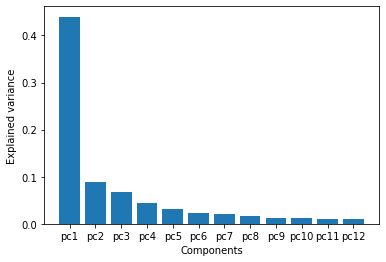

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(X)
XPCA = pca.transform(X)
dadosPCA = pd.DataFrame(XPCA, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])
plt.bar(['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'],pca.explained_variance_ratio_)
plt.xlabel('Compoenentes')
plt.ylabel('Variância explicada')

In [35]:
def varpac(c):
    pca = PCA(n_components=c)
    pca.fit(X)
    vare=sum (pca.explained_variance_ratio_)
    return vare

componentes=[1,2,3,4,5]

Text(0, 0.5, 'Variância explicada acumulada(%)')

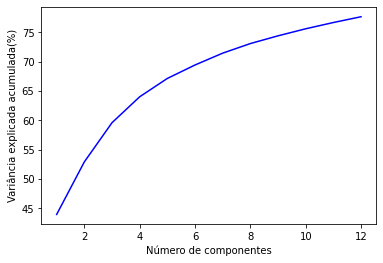

In [39]:
varacumulada = []
componentes=[1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(0,len(componentes)):
    varacumulada.append(varpac(componentes[i]))
plt.plot(componentes,100 *np.array(varacumulada),color='b')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada acumulada(%)')


In [55]:
X1 = XB[0:amostras]
X0 = XB[amostras:200]

In [59]:
pca = PCA(n_components=4)
pca.fit(X0)
dadosPCA_impostor = pd.DataFrame(pca.transform(X0), columns=['pc1','pc2','pc3','pc4'])

In [58]:
pca = PCA(n_components=4)
pca.fit(X1)
dadosPCA_locutor = pd.DataFrame(pca.transform(X1), columns=['pc1','pc2','pc3','pc4'])

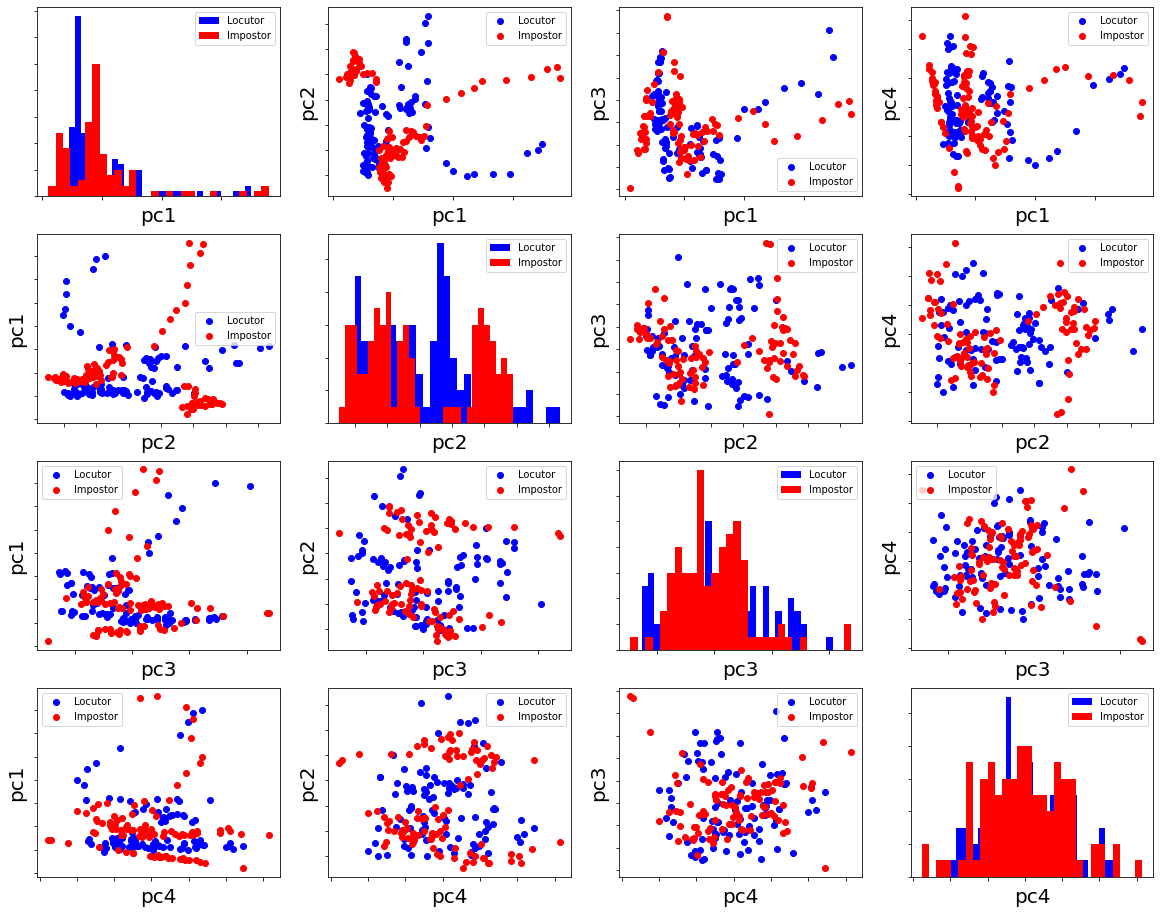

In [62]:
varr =['pc1','pc2','pc3','pc4']
fig, axs = plt.subplots(4,4,figsize=(20, 16))
for i in range(0,4):
    for j in range(0,4): 
        if(varr[i]==varr[j]):
            axs[i, j].hist(dadosPCA_locutor[varr[j]],label='Locutor',bins=30,color='blue')
            axs[i, j].hist(dadosPCA_impostor[varr[j]],label='Impostor',bins=30,color='red')
            axs[i, j].set(xlabel=varr[i]) 
            axs[i, j].xaxis.label.set_size(20)
            axs[i,j].set_xticklabels([])
            axs[i,j].set_yticklabels([])
            axs[i, j].legend()
        else:
            
            axs[i, j].scatter(dadosPCA_locutor[varr[i]],dadosPCA_locutor[varr[j]],label='Locutor',color='blue')
            axs[i, j].scatter(dadosPCA_impostor[varr[i]],dadosPCA_impostor[varr[j]],label='Impostor',color='red')
            axs[i, j].set(xlabel=varr[i], ylabel=varr[j])
            axs[i, j].xaxis.label.set_size(20)
            axs[i, j].yaxis.label.set_size(20)
            axs[i,j].set_xticklabels([])
            axs[i,j].set_yticklabels([])
            axs[i, j].legend()

Verifica-se então que é possível separar o locutor de estudo dos demais locutores. Uma vez que seu espectrograma nós diz muito a respeito de sua voz.